# Build a model using pretrained word embeddings (glove)

(here we go from raw text to word embeddings)

In [1]:
import os
import zipfile

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

import matplotlib.pyplot as plt

Using Theano backend.


### Parameters

In [2]:
imdb_dataset_dir = './imdb_raw/'
imdb_file = imdb_dataset_dir+'aclImdb.zip'

In [3]:
zipfolder = 'https://mng.bz/0tIo'

### Download Data

In [4]:
if not os.path.exists(imdb_dataset_dir):
    os.mkdir(imdb_dataset_dir)
    
    os.system("wget --no-check-certificate " + zipfolder +' -O '+ imdb_file)
    print("Data downloaded!")
    
    with zipfile.ZipFile(imdb_file,"r") as zip_ref:
        zip_ref.extractall(imdb_dataset_dir)
    print("Folder unzipped!")

## Processing the labels of the raw IMDB data

In [5]:
imdb_dir = imdb_dataset_dir + '/aclImdb/'

In [6]:
train_dir = os.path.join(imdb_dir, 'train')

In [7]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
len(labels)

25000

In [9]:
len(texts)

25000

# Tokenizing the text of the raw IMDB data

#### (we rescrict to only 200 samples!)

In [10]:
maxlen = 100
# Cuts off reviews after 100 words

training_samples = 200
# Trains on 200 samples

validation_samples = 10000
# Validates on 10,000 samples

max_words = 10000
# Considers only the top 10,000 words in the dataset

In [11]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [12]:
len(sequences)

25000

In [13]:
type(sequences[5])

list

In [14]:
len(sequences[5])

158

In [15]:
print(sequences[5])

[35, 384, 69, 377, 122, 31, 658, 12, 10, 216, 11, 17, 14, 170, 4, 3, 4844, 10, 13, 63, 1095, 28, 475, 5120, 248, 2, 35, 10, 117, 5, 1, 17, 2354, 1128, 10, 1800, 1, 6887, 48, 1, 246, 17, 26, 66, 8, 2043, 13, 206, 26, 2525, 69, 117, 5, 2039, 3432, 26, 576, 69, 12, 2697, 1, 297, 2354, 26, 298, 9, 59, 27, 352, 5, 2903, 50, 45, 10, 4381, 5, 103, 1, 223, 17, 35, 103, 9, 10, 119, 15, 875, 7, 7, 11, 17, 6, 391, 555, 370, 57, 10, 89, 356, 5, 137, 80, 111, 1371, 329, 1, 82, 853, 1, 635, 94, 54, 278, 1, 113, 13, 391, 10, 121, 9, 13, 421, 5, 27, 3, 209, 18, 1, 2997, 4, 1, 290, 106, 13, 22, 235, 350, 5, 103, 9, 14, 139, 5, 460, 30, 18, 42, 35, 75, 12, 9, 215, 57, 160, 8, 12, 93, 794]


In [16]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [17]:
word_index['building']

1427

In [18]:
data = pad_sequences(sequences, maxlen=maxlen)

In [19]:
data[2]

array([2588,  866,   20, 1160,  705,  163,  518,  165,   37,    1, 1357,
       7095,   16, 2278,   10,  188,  835,  146,    9,  206,    1, 1699,
          4, 9458,    2,  234,   42, 4043,   57,   16,    9,  692,  800,
        885,    8,  359,    6,   46,  429,    4,   60, 9878,    1,  356,
         15,  153,    5,  190,   20,   75,   99,   37,   11,    8,  657,
          5,  987,   15,   65, 3348,  456,   16,   91, 2652,    5,    2,
       1275,  754,   31,    1,  127,  143,  317, 1014,    5,   64,    3,
       5845, 3626, 2052,  118,   26, 1542,   24, 1040,  348,  953, 2485,
        844,   10,   97,   25, 6041,   22,   15,   11,    8, 5514,   18,
       5675])

In [20]:
labels = np.asarray(labels)

In [21]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


#### Shuffle data:

In [22]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

#### Split data in training and validation

In [23]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val   = data[training_samples: training_samples + validation_samples]
y_val   = labels[training_samples: training_samples + validation_samples]

# Download glove databse

In [24]:
glove_zipfolder = 'http://nlp.stanford.edu/data/glove.6B.zip'

In [25]:
glove_dir = './glove/'
glove_file = glove_dir + 'glove.6B.zip'

In [26]:
if not os.path.exists(glove_dir):
    os.mkdir(glove_dir)
    
    os.system("wget --no-check-certificate " + glove_zipfolder +' -O '+ glove_file)
    print("Data downloaded!")
    
    with zipfile.ZipFile(glove_file,"r") as zip_ref:
        zip_ref.extractall(glove_dir)
    print("Folder unzipped!")

# Parsing the GloVe word-embeddings file

In [27]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [28]:
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [29]:
embeddings_index['building']

array([ 0.6005   ,  0.33204  , -0.49294  ,  0.75419  ,  0.048023 ,
       -0.083043 , -0.39718  ,  0.37912  ,  0.38602  ,  1.0305   ,
        0.89795  , -0.4345   ,  0.25965  ,  0.37307  , -0.28395  ,
       -0.32199  ,  0.23112  ,  0.66848  , -0.44291  , -0.43475  ,
       -0.046315 ,  0.18962  ,  0.045551 , -0.79974  ,  0.19711  ,
       -0.90737  , -0.42556  , -0.18526  , -0.83046  ,  0.52057  ,
       -0.085309 ,  0.37004  ,  0.37261  ,  0.46791  , -0.011974 ,
       -0.22894  ,  0.062635 , -0.52736  ,  0.13784  ,  0.11571  ,
       -0.085667 , -0.82202  ,  0.3249   ,  0.16222  ,  0.97131  ,
        0.34441  ,  0.055378 ,  0.45237  ,  0.16631  , -0.41808  ,
       -0.014013 , -0.43101  , -0.0046088,  1.2581   , -0.43896  ,
       -2.8801   , -0.27207  , -0.41413  ,  1.7549   ,  0.32325  ,
       -0.54772  ,  0.6094   ,  0.29493  ,  0.88821  ,  0.51222  ,
       -0.083026 ,  0.46329  ,  0.35006  ,  0.044343 , -0.42597  ,
        0.30314  ,  0.016289 , -0.17063  , -0.84313  ,  0.4269

# Preparing the GloVe word-embeddings matrix

In [30]:
embedding_dim = 100

### Note: here I am associating to each word of my text, a vector from glove

In [31]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Model definition

In [32]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Loading pretrained word embeddings into the Embedding layer

In [34]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Training and evaluation

In [35]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [36]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 15ms/step - loss: 2.2307 - acc: 0.4300 - val_loss: 0.6913 - val_acc: 0.5179
Epoch 2/10
200/200 [==============================] - 3s 14ms/step - loss: 0.5979 - acc: 0.7300 - val_loss: 0.9215 - val_acc: 0.5069
Epoch 3/10
200/200 [==============================] - 3s 15ms/step - loss: 0.5014 - acc: 0.7450 - val_loss: 0.7517 - val_acc: 0.5228
Epoch 4/10
200/200 [==============================] - 3s 14ms/step - loss: 0.4591 - acc: 0.7950 - val_loss: 0.7522 - val_acc: 0.5338
Epoch 5/10
200/200 [==============================] - 3s 13ms/step - loss: 0.3834 - acc: 0.8300 - val_loss: 1.0179 - val_acc: 0.5117
Epoch 6/10
200/200 [==============================] - 3s 14ms/step - loss: 0.1727 - acc: 0.9750 - val_loss: 1.0237 - val_acc: 0.5071
Epoch 7/10
200/200 [==============================] - 2s 12ms/step - loss: 0.1848 - acc: 0.9200 - val_loss: 1.3910 - val_acc: 0.5043
Epoch 8/10
200/200 [=

In [37]:
model.save_weights('pre_trained_glove_model.h5')

# Plotting the results

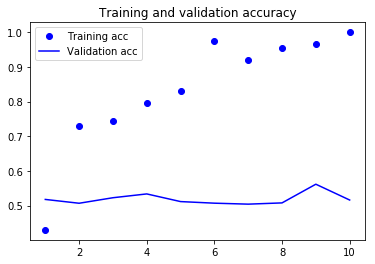

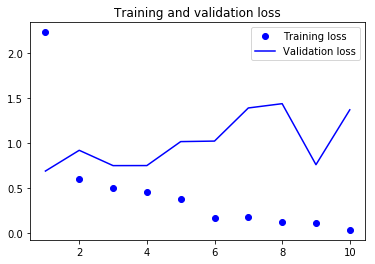

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Training the same model without pretrained word embeddings

In [39]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [42]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 14ms/step - loss: 0.6890 - acc: 0.5300 - val_loss: 0.6922 - val_acc: 0.5151
Epoch 2/10
200/200 [==============================] - 3s 15ms/step - loss: 0.4931 - acc: 0.9650 - val_loss: 0.7112 - val_acc: 0.5071
Epoch 3/10
200/200 [==============================] - 3s 14ms/step - loss: 0.3022 - acc: 1.0000 - val_loss: 0.7283 - val_acc: 0.5090
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 0.1624 - acc: 1.0000 - val_loss: 0.7143 - val_acc: 0.5245
Epoch 5/10
200/200 [==============================] - 3s 14ms/step - loss: 0.0844 - acc: 1.0000 - val_loss: 0.7107 - val_acc: 0.5351
Epoch 6/10
200/200 [==============================] - 3s 14ms/step - loss: 0.0442 - acc: 1.0000 - val_loss: 0.7291 - val_acc: 0.5291
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.7453 - val_acc: 0.5295
Epoch 8/10
200/200 [=

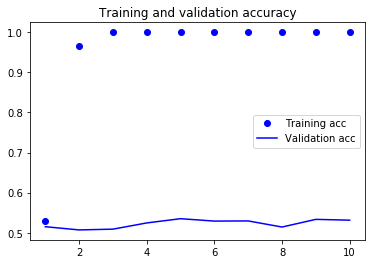

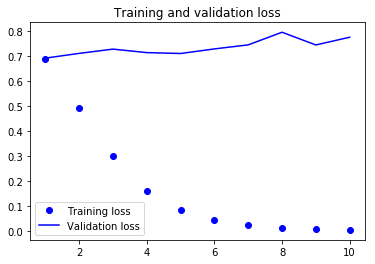

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Note: in this case there is no grat difference between pretrained and not. This because the training sample is very small!

# Finally, let’s evaluate the model on the test data.

## Tokenizing the data of the test set

In [44]:
test_dir = os.path.join(imdb_dir, 'test')

In [45]:
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

# Load and evaluate the first model

In [46]:
model.load_weights('pre_trained_glove_model.h5')

In [47]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 11s 432us/step


[1.3949954720211029, 0.51324]